In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from models import utils
from models.MF.model import MF

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

# 1. Load things

## 1.1. Load raw data

In [4]:
path_raw_occ = "../data/AllSites_SiteOccurrences_AllGenera_26.1.24.csv"

df_occ_raw = pd.read_csv(path_raw_occ)

In [5]:
cols_redundant = [
    'LAT',
    'LONG',
    'ALTITUDE',
    'MAX_AGE',
    'BFA_MAX',
    'BFA_MAX_ABS',
    'MIN_AGE',
    'BFA_MIN',
    'BFA_MIN_ABS',
    'COUNTRY',
    'age_range',
    'Total_Gen_Count',
    'Large_GenCount',
    'Small_GenCount',
    'smallperlarge',
    'smallprop',
    'Herb_GenCount',
    'Nonherb_GenCount',
    'DietRatio',
    'HerbProp',
    'mid_age'
 ]

df_occ_raw = df_occ_raw.drop(columns=cols_redundant).set_index('SITE_NAME')

df_occ_raw.head()

,Equus,Coelodonta,Bos,Gazella,Ursus,Vulpes,Cervus,Canis,Sus,Homo,...,Euarctos,Paracervulus,Eostyloceros,Cervocerus,Antispiroides,Sinoryx,Prospalax,Pliopetaurista,Predicrostonyx,Boocercus
SITE_NAME,,,,,,,,,,,,,,,,,,,,,
Aba Zawei,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abric Romani,1,0,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Acheng_Jiaojie,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adler cave,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Adyrgan,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2. Load embeddings learnt from MF (regression)

In [6]:
path_dir_emb = Path("models/data_processed/mf_PROBABILITY_OUTPUT=True/Mar04_15-20-31")

path_emb_site = path_dir_emb / "emb_sites.npy"
path_emb_species = path_dir_emb / "emb_species.npy"

emb_sites = np.load(path_emb_site).squeeze()
emb_species = np.load(path_emb_species).squeeze()

## 1.3. Load encoders

In [7]:
path_dir_encode = Path("models/data_processed/encoder")

path_enc_species = path_dir_encode / "ordinal_enc_species.json"
path_enc_site = path_dir_encode / "ordinal_enc_site.json"

enc_species = utils.CategoryDict.from_file(path_enc_species)
enc_site = utils.CategoryDict.from_file(path_enc_site)

# 2. Predict the preferences

In [8]:
preferences = emb_sites @ emb_species.T

In [9]:
N = 40
sites_top_species = np.argpartition(preferences, -N, axis=1)[-N:]

sites_top_species

array([[312, 451, 450, ..., 130,   2, 116],
       [307, 225,   2, ..., 147,   4,  56],
       [343, 451, 450, ...,   1,   2,   0],
       ...,
       [176, 225, 447, ..., 382,  43,   0],
       [195, 451, 445, ...,  70,  75,   0],
       [324, 225, 450, ...,   1, 331,   0]])

# 3. Build species profile

## 3.1. Load dim tables

In [10]:
path_dir_raw_data = Path("../data/")

path_raw = path_dir_raw_data / "now_export_locsp_public_2024-02-08T19#42#46+0000.csv"
path_dentaltrait_species = path_dir_raw_data / "DentalTraits_Species_PPPA.csv"
path_mammal_diet = path_dir_raw_data / "FossilGenera_MammalMassDiet_Jan24.csv"

In [11]:
df_raw = pd.read_csv(path_raw)

df_raw.head()

,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,ALTITUDE,MAX_AGE,BFA_MAX,BFA_MAX_ABS,...,STONE_TOOLS,TECHNOLOGICAL_MODE_1,TECHNOLOGICAL_MODE_2,TECHNOLOGICAL_MODE_3,CULTURAL_STAGE_1,CULTURAL_STAGE_2,CULTURAL_STAGE_3,REGIONAL_CULTURE_1,REGIONAL_CULTURE_2,REGIONAL_CULTURE_3
0,21390,Aarau,47 23 0 N,8 3 0 E,47.383000,8.050000,\N,14.2000,mn6,\N,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,29029,Aarwangen,47 14 37 N,7 45 21 E,47.243654,7.755959,\N,25.4100,mp27,\N,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,27232,Aba Zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,\N,0.0295,\N,C14,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,27232,Aba Zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,\N,0.0295,\N,C14,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,27232,Aba Zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,\N,0.0295,\N,C14,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [12]:
df_dtr_spe = pd.read_csv(path_dentaltrait_species, encoding='unicode_escape', index_col=0)\
    .rename(columns={
        'Genus': 'GENUS', 'Order': 'ORDER', 'Family': 'FAMILY', 'Species': 'SPECIES'
    })

df_dtr_spe.head()

,Binomial,ORDER,FAMILY,Mass.g,Mass.Method,Mass.Source,Diet.Plant,Diet.Vertebrate,Diet.Invertebrate,Diet.Method,...,FCT_HOD,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,OO,ETH,LOPT,BUN
1,Addax_nasomaculatus,Cetartiodactyla,Bovidae,70000.3,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,0,1,1,0,0,0,0,0,0
2,Aepyceros_melampus,Cetartiodactyla,Bovidae,52500.1,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,0,1,0,0,0,1,0,0,0
3,Alcelaphus_buselaphus,Cetartiodactyla,Bovidae,171001.5,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,0,1,0,1,0,0,0,0,0
4,Alces_alces,Cetartiodactyla,Cervidae,356998.0,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,1,1,0,0,0,0,0,0,0
5,Allochrocebus_lhoesti,Primates,Cercopithecidae,5375.0,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",90,10,0,Reported 000 Species,...,1,0,0,0,0,0,0,0,0,1


In [13]:
df_genera_diet = pd.read_csv(path_mammal_diet).rename(columns={
    'Genus': 'GENUS', 'Order': 'ORDER', 'Family': 'FAMILY'
})

df_genera_diet.head()

,GENUS,ORDER,FAMILY,MassSource,Massg,LogMass,LargeSmall,SizeClass,Diet,DietSource
0,Abudhabia,Rodentia,Muridae,Family average,1.343147e+02,2.128124,Small,small,Herbivore,Phylacine
1,Aceratherium,Perissodactyla,Rhinocerotidae,Cooke,1.099006e+06,6.041000,Large,large,Herbivore,Phylacine
2,Acinonyx,Carnivora,Felidae,Phylacine,4.670000e+04,4.669317,Large,large,Non-Herbivore,Phylacine
3,Aepyosciurus,Rodentia,Sciuridae,NOW,2.860000e+02,2.456366,Small,small,Herbivore,Phylacine
4,Aeretes,Rodentia,Sciuridae,Phylacine,7.324000e+02,2.864748,Small,small,Herbivore,Phylacine


## 3.2. Create fact table

In [14]:
df_species_raw = df_raw[['ORDER', 'FAMILY', 'GENUS', 'SPECIES',]].copy()

df_species_raw.head()

,ORDER,FAMILY,GENUS,SPECIES
0,Artiodactyla,Cainotheriidae,Microtherium,renggeri
1,Artiodactyla,Bachitheriidae,Bachitherium,insigne
2,Perissodactyla,Equidae,Equus,indet.
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis
4,Artiodactyla,Bovidae,Bos,primigenius


In [23]:
df_species = df_species_raw\
    .merge(right=df_genera_diet, how='left', on=['ORDER', 'FAMILY', 'GENUS'])\
    .merge(right=df_dtr_spe, how='left', on=['ORDER', 'FAMILY', 'GENUS', 'SPECIES'])

df_species.head()

,ORDER,FAMILY,GENUS,SPECIES,MassSource,Massg,LogMass,LargeSmall,SizeClass,Diet,...,FCT_HOD,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,OO,ETH,LOPT,BUN
0,Artiodactyla,Cainotheriidae,Microtherium,renggeri,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artiodactyla,Bachitheriidae,Bachitherium,insigne,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Perissodactyla,Equidae,Equus,indet.,MOM,3.509548e+05,5.545251,Large,large,Herbivore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,Cooke,2.897344e+06,6.462000,Large,large,Herbivore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Artiodactyla,Bovidae,Bos,primigenius,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cols = ['ORDER', 'FAMILY', 'GENUS', 'SPECIES', 'Massg', 'LargeSmall',
        'SizeClass', 'Diet', 'Diet.Plant', 'Diet.Vertebrate',
       'Diet.Invertebrate', 'HYP.x', 'LOP.x','HYP.y', 'LOP.y', 'FCT_HOD', 'FCT_AL',
       'FCT_OL', 'FCT_SF', 'FCT_OT', 'FCT_CM', 'OO', 'ETH', 'LOPT', 'BUN']

df_species = df_species[cols]

df_species.head()

,ORDER,FAMILY,GENUS,SPECIES,Massg,LargeSmall,SizeClass,Diet,Diet.Plant,Diet.Vertebrate,...,FCT_HOD,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,OO,ETH,LOPT,BUN
0,Artiodactyla,Cainotheriidae,Microtherium,renggeri,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artiodactyla,Bachitheriidae,Bachitherium,insigne,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Perissodactyla,Equidae,Equus,indet.,3.509548e+05,Large,large,Herbivore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,2.897344e+06,Large,large,Herbivore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Artiodactyla,Bovidae,Bos,primigenius,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
enc_site.ids2names([0])

['Aba Zawei']

In [26]:
df_site = df_species[df_species['GENUS'].isin(enc_species.ids2names(sites_top_species[0]))]
df_site.head()

,ORDER,FAMILY,GENUS,SPECIES,Massg,LargeSmall,SizeClass,Diet,Diet.Plant,Diet.Vertebrate,...,FCT_HOD,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,OO,ETH,LOPT,BUN
2,Perissodactyla,Equidae,Equus,indet.,3.509548e+05,Large,large,Herbivore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,2.897344e+06,Large,large,Herbivore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Artiodactyla,Bovidae,Bos,primigenius,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Artiodactyla,Bovidae,Gazella,prjewalskyi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Rodentia,Muridae,Stephanomys,donnezani,1.343147e+02,Small,small,Herbivore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_site['Diet'].value_counts()

Diet
Herbivore        12172
Non-Herbivore     9181
Name: count, dtype: int64

<Axes: xlabel='HYP.x', ylabel='Density'>

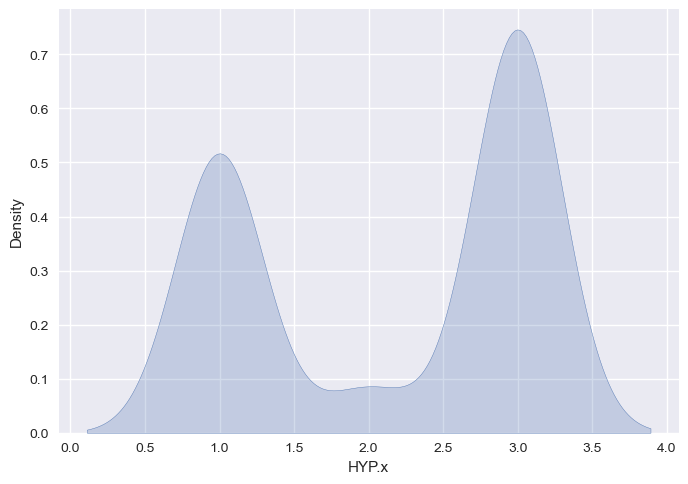

In [27]:
sns.kdeplot(df_site['HYP.x'], fill=True)